# This is an extension of Project_ori notebook

To handle missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn import metrics
import pickle

df = pickle.load(open('df_corrected','rb'))
df.head()

,id,car_name,brand,model,new_price,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,NaN,NaN,NaN,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,711000.0,748000.0,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,NaN,NaN,NaN,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,NaN,NaN,NaN,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,1014000.0,1379000.0,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [2]:
df.shape

(19544, 17)

# Check for NaN values

In [3]:
print("\n Missing percentage \n")
print(df.isnull().mean()*100)


 Missing percentage 

id                    0.000000
car_name              0.000000
brand                 0.000000
model                 0.000000
new_price            51.688498
min_cost_price       51.688498
max_cost_price       51.688498
vehicle_age           0.000000
km_driven             0.000000
seller_type           0.000000
fuel_type             0.000000
transmission_type     0.000000
mileage               0.000000
engine                0.000000
max_power             0.000000
seats                 0.000000
selling_price         0.000000
dtype: float64


<AxesSubplot:>

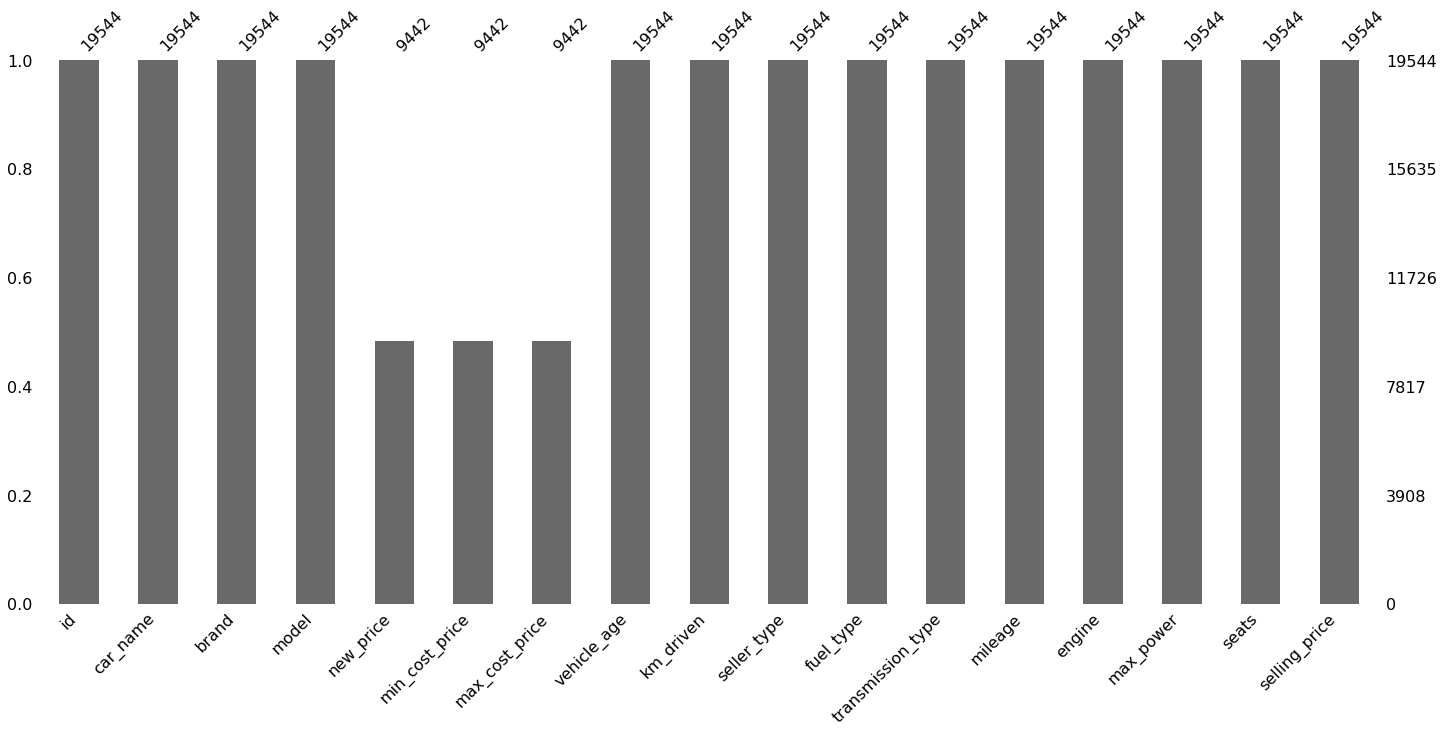

In [4]:
#bar graph to show how much data is missing and from which columns
msno.bar(df)

In [5]:
#Check the correlation of all columns with selling price
corr_matrix = df.corr()
print(corr_matrix["selling_price"].sort_values(ascending=False))

selling_price     1.000000
min_cost_price    0.771494
max_power         0.750761
max_cost_price    0.697012
engine            0.587358
seats             0.073442
id                0.024660
km_driven        -0.103680
vehicle_age      -0.267211
mileage          -0.289664
Name: selling_price, dtype: float64


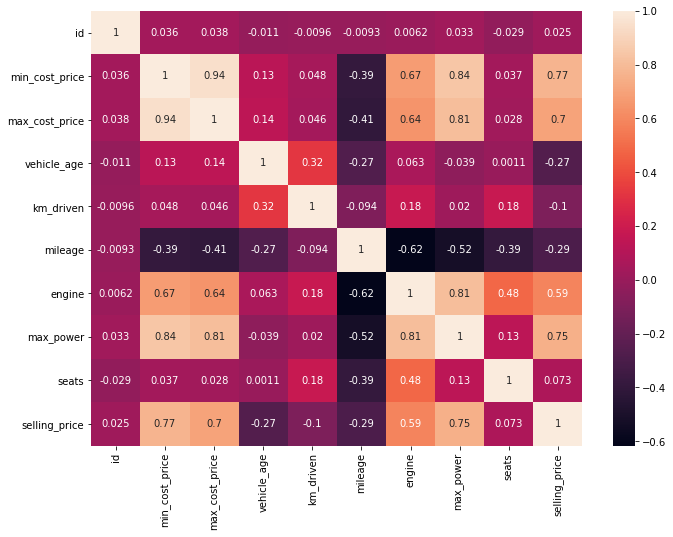

In [6]:
heat = plt.subplots(figsize = (11,8))
heat = sns.heatmap(corr_matrix, annot=True)
plt.show()

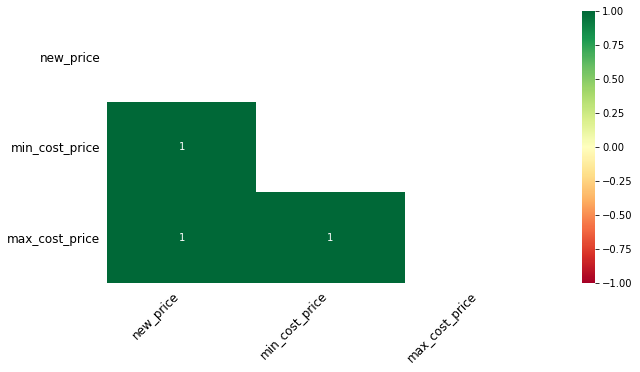

In [7]:
#this shows that all missing data of new price corresponds to missing data of max_cost and min_cost
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

# Using Iterative Imputer to handle missing values

In [8]:
brand_list = df['brand'].unique()
model_list = df['model'].unique()
brands = pd.Series(brand_list)
# print("\nTotal number of brands: ",brands.shape)
# df['brand'].value_counts()

In [9]:
#df_mice is dataframe that we use to impute missing values
df_mice = pd.DataFrame(df)
# df_mice.drop(['vehicle_age','km_driven','mileage'],axis=1,inplace=True)
#mice for missing values
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
num = [col for col in df_mice.columns if df_mice[col].dtypes != 'O']
imputer = IterativeImputer(imputation_order='ascending',max_iter=100,random_state=0,n_nearest_features=None)
df2 = pd.DataFrame(imputer.fit_transform(df_mice[num]))
df2.head(20)

,0,1,2,3,4,5,6,7,8,9
0,0.0,5.603399e+05,8.634365e+05,9.0,120000.0,19.70,796.0,46.30,5.0,120000.0
1,1.0,7.110000e+05,7.480000e+05,5.0,20000.0,18.90,1197.0,82.00,5.0,550000.0
2,2.0,4.816513e+05,7.596647e+05,11.0,60000.0,17.00,1197.0,80.00,5.0,215000.0
3,3.0,4.022373e+05,6.608389e+05,9.0,37000.0,20.92,998.0,67.10,5.0,226000.0
4,4.0,1.014000e+06,1.379000e+06,6.0,30000.0,22.77,1498.0,98.59,5.0,570000.0
5,5.0,5.160000e+05,6.940000e+05,8.0,35000.0,18.90,998.0,67.10,5.0,350000.0
6,6.0,6.540000e+05,6.630000e+05,8.0,40000.0,20.36,1197.0,78.90,5.0,315000.0
7,7.0,5.260000e+05,7.010000e+05,3.0,17512.0,20.51,998.0,67.04,5.0,410000.0
8,8.0,7.700000e+05,1.302000e+06,2.0,20000.0,18.15,998.0,118.35,5.0,1050000.0
9,9.0,1.206540e+06,1.627510e+06,4.0,70000.0,18.49,1493.0,100.00,7.0,575000.0


In [10]:
# df.drop(['min_cost_price'], axis=1,inplace=True)
# df.drop(['max_cost_price'], axis=1,inplace=True)
df2.iloc[:,[1,2]]
df['min_cost_price'] = df2.iloc[:,[1]]
df['max_cost_price'] = df2.iloc[:,[2]]

In [11]:
#how many rows are still nan ?
df.loc[df['max_cost_price'].isnull()]

,id,car_name,brand,model,new_price,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [12]:
#check for false values
comp = list(np.where((df['min_cost_price'] <= df['max_cost_price']) | (df['min_cost_price'].isnull()),True,False))
i=False
if i in comp:
    print("False Values")
    print(comp.count(i))
else:
    print("No False Values")
    
#Check the correlation of all columns with selling price
corr_matrix = df.corr()
print(corr_matrix["selling_price"].sort_values(ascending=False))

No False Values
selling_price     1.000000
min_cost_price    0.839562
max_cost_price    0.778815
max_power         0.750761
engine            0.587358
seats             0.073442
id                0.024660
km_driven        -0.103680
vehicle_age      -0.267211
mileage          -0.289664
Name: selling_price, dtype: float64


In [13]:
df.loc[(df['min_cost_price'] > df['max_cost_price'])]

,id,car_name,brand,model,new_price,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [14]:
df.isnull().sum()

id                       0
car_name                 0
brand                    0
model                    0
new_price            10102
min_cost_price           0
max_cost_price           0
vehicle_age              0
km_driven                0
seller_type              0
fuel_type                0
transmission_type        0
mileage                  0
engine                   0
max_power                0
seats                    0
selling_price            0
dtype: int64

In [15]:
df.drop(['new_price'], axis=1,inplace=True)
df.dropna(inplace=True)
df

,id,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,5.603399e+05,8.634365e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,4.816513e+05,7.596647e+05,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,4.022373e+05,6.608389e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,19539,Toyota Platinum,Toyota,Platinum,1.350592e+06,1.809444e+06,4,69480,Dealer,Diesel,Manual,23.59,1364,67.05,5,650000
19540,19540,Maruti Ertiga,Maruti,Ertiga,1.647752e+06,2.155874e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,19541,Skoda Rapid,Skoda,Rapid,9.149450e+05,1.288662e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,19542,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


# Store the avg of min_cost_price and max_cost_price

In [16]:
#dictionary for min_cost_price and max_cost_price that we will use in python django at backend
max_dict = {}
min_dict = {}

#function to find mean for each model
def find_mean(car_model):
    brand_df = df.loc[(df['model']== car_model)]
    
    model_max = brand_df['max_cost_price'].mean()
    model_min = brand_df['min_cost_price'].mean()
    
    if(model_max > 0):
        max_dict[car_model] = model_max
        min_dict[car_model] = model_min

    
#find the mean for each brand
for l in model_list:
    find_mean(l)

In [17]:
print("Total no. of models : ",len(min_dict))
for i in min_dict:
    print(i,"\t"*3, min_dict[i],"\t"*3,max_dict[i])

Total no. of models :  258
Alto 			 435075.1571070218 			 657596.8943991547
Grand 			 766563.6765591359 			 923702.0350566249
i20 			 907119.2073233593 			 1349666.6080150863
Ecosport 			 1040523.6634664325 			 1418663.8680953356
Wagon R 			 561001.1360925783 			 742147.1128428978
i10 			 606068.6719423359 			 859079.3746873568
Venue 			 986468.7725286946 			 1501124.0437844852
TUV 			 1412335.1878709998 			 1875443.387634497
Indigo 			 641383.7900842548 			 959593.4745997444
Captur 			 1922018.8885576536 			 2480481.0895933732
Swift 			 863898.7077670773 			 1214217.0678543223
Micra 			 811643.0444034999 			 1158065.2703825638
Verna 			 1196644.7950924502 			 1728497.5800516587
Duster 			 1213702.9553646606 			 1648232.8052692378
Cooper 			 4086603.2794227987 			 5064341.351614209
Ciaz 			 1219199.5739687616 			 1638200.8568505356
C-Class 			 4974954.760183658 			 8816230.705202391
Innova 			 2017883.1824182454 			 2730134.930525512
Baleno 			 876603.8979519748 			 1266763.0228677825


# Dump df, model_list, min_max

In [18]:
pickle.dump(df,open('df_handled','wb'))
pickle.dump(model_list,open('model_list','wb'))
pickle.dump(max_dict,open('model_max_dict','wb'))
pickle.dump(min_dict,open('model_min_dict','wb'))

# Load the files

In [19]:
df_handled = pickle.load(open('df_handled','rb'))
model_list = pickle.load(open('model_list','rb'))
model_min_dict = pickle.load(open('model_min_dict','rb'))
model_max_dict = pickle.load(open('model_max_dict','rb'))
print(model_list)
print(model_min_dict)
print(model_max_dict)
df_handled

['Alto' 'Grand' 'i20' 'Ecosport' 'Wagon R' 'i10' 'Venue' 'TUV' 'Indigo'
 'Captur' 'Swift' 'Micra' 'Verna' 'Duster' 'Cooper' 'Ciaz' 'C-Class'
 'Innova' 'Baleno' 'Swift Dzire' 'Grande' 'Vento' 'Creta' 'Xylo' 'City'
 'Bolero' 'Fortuner' 'KWID' 'Amaze' 'Santro' 'XUV500' 'Sail' 'Xcent' '800'
 'Avigo' 'Nano' 'KUV100' 'Etios' 'Ignis' 'Corolla' 'RediGO' 'Vista' 'Omni'
 'Scorpio' 'Marazzo' 'Aspire' 'Figo' 'Supro' 'Vitara' 'Tiago' 'Polo'
 'Seltos' 'Beat' 'Celerio' 'Terrano' 'Santa' 'GO' '5' 'CR-V' 'Endeavour'
 'KUV' 'Aveo' 'Jazz' 'Pajero' 'Indica' '3' 'Ritz' 'S-Cross' 'Sumo'
 'Accord' 'Q5' 'A4' 'Tigor' 'Manza' 'Brio' 'SX4' 'Q3' 'Ertiga' 'Safari'
 'Sunny' 'GLA' 'Thar' 'Hexa' 'Zen' 'Laura' 'Avventura' 'Rover' 'BRV'
 'Eeco' 'A6' 'E-Class' 'Quanto' 'Q7' 'NuvoSport' 'Z4' 'Koleos' 'A3' '6'
 'Land Cruiser' 'Scala' 'XF' 'X5' 'Zest' 'CLA' 'Matiz' 'Mulsanne' 'Hector'
 'EON' 'Ameo' 'Spark' 'GLE' 'Civic' 'Kizashi' 'D-Max' 'Cayenne' 'Fabia'
 'X1' 'Rapid' 'Freestyle' 'Bolt' 'Superb' 'Captiva' '1' 'Platinum' '

,id,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,5.603399e+05,8.634365e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,4.816513e+05,7.596647e+05,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,4.022373e+05,6.608389e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19539,19539,Toyota Platinum,Toyota,Platinum,1.350592e+06,1.809444e+06,4,69480,Dealer,Diesel,Manual,23.59,1364,67.05,5,650000
19540,19540,Maruti Ertiga,Maruti,Ertiga,1.647752e+06,2.155874e+06,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,19541,Skoda Rapid,Skoda,Rapid,9.149450e+05,1.288662e+06,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,19542,Mahindra XUV500,Mahindra,XUV500,1.783000e+06,2.491000e+06,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
